# Predictigo
 A ML Model to apply regularized linear regression to past data to make future predictions but for single linear regression predictions

In [165]:
import numpy as np
import copy, math
%matplotlib widget
import matplotlib.pyplot as plot 
import pandas as pd
np.set_printoptions(precision=2)

In [166]:
data = np.loadtxt("test_data_fin.csv", delimiter=",")
x_train = data[:, 0]
y_train = data[:, 1]

### Get to know your data

In [167]:

print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  


print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [52352.54 55180.32 58960.02 67236.1  67732.54]
The shape of x_train is: (40,)
The shape of y_train is:  (40,)
Number of training examples (m): 40


### Now we plot it to visualize it

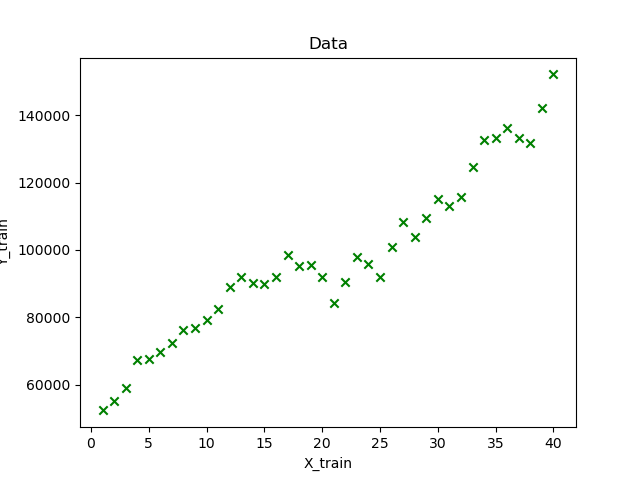

In [169]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plot.figure(10)
plot.scatter(x_train, y_train, marker='x', c='g') 

# Set the title
plot.title("Data")
# Set the y-axis label
plot.ylabel('Y_train')
# Set the x-axis label
plot.xlabel('X_train')
plot.show()

### Compute the Cost Function

In [170]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """

    #number of training examples
    m = x.shape[0]
    cost = 0

    for i in range(m):
        y_hat = x[i] * w + b
        cost += (y_hat - y[i])**2

    cost = cost / (2 * m)

    return cost

In [171]:
# Compute cost with some initial values for paramaters w, b
w_init = 21
b_init = 1

cost = compute_cost(x_train, y_train, w_init, b_init)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 5015799237.643


In [172]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """

    mu = np.mean(X)

    sigma = np.std(X)

    X_norm = (X - mu) / sigma

    return (X_norm, mu, sigma)

In [174]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = 20.5, 
X_sigma = 11.543396380615196
Peak to Peak range by column in Raw        X:39.0
Peak to Peak range by column in Normalized X:3.378555038228838


In [175]:
print(compute_cost(X_norm, y_train, w_init, b_init))

5062912275.331302


### Compute the gradient

In [176]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        dj_dw += ((w * x[i]) - y[i]) * x[i]
        dj_db += (w * x[i] + b) - y[i]
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [177]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -2272830.928 -97619.563


In [178]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [185]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 10.
initial_b = 0.

# some gradient descent settings
iterations = 10000 #change this value to whatever you like
alpha = 0.002 #change this value to whatever you like

w_best,b_best,_,_ = gradient_descent(X_norm ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w_best, b_best)

Iteration    0: Cost 5043123081.48   
Iteration 1000: Cost 113455863.52   
Iteration 2000: Cost 23526777.92   
Iteration 3000: Cost 21886253.30   
Iteration 4000: Cost 21856326.15   
Iteration 5000: Cost 21855780.21   
Iteration 6000: Cost 21855770.25   
Iteration 7000: Cost 21855770.07   
Iteration 8000: Cost 21855770.06   
Iteration 9000: Cost 21855770.06   
w,b found by gradient descent: 23531.192813201018 97619.56280278062


In [186]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_best * X_norm[i] + b_best

Text(0.5, 0, 'X_train_normalized')

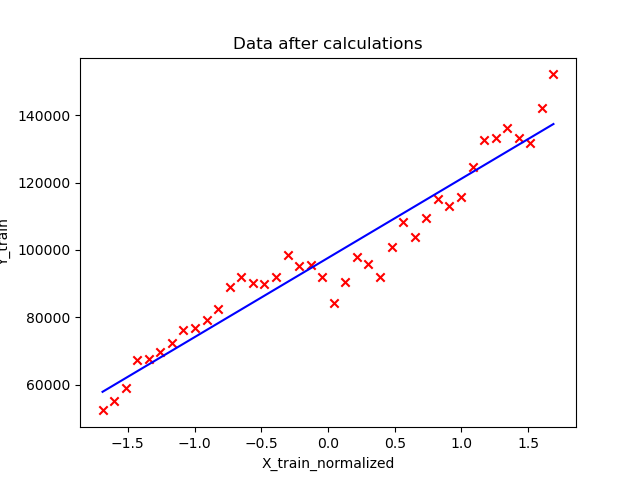

In [187]:
# Plot the linear fit
plot.figure(26)
plot.plot(X_norm, predicted, c = "b")

# Create a scatter plot of the data. 
plot.scatter(X_norm, y_train, marker='x', c='r') 

# Set the title
plot.title("Data after calculations")
# Set the y-axis label
plot.ylabel('Y_train')
# Set the x-axis label
plot.xlabel('X_train_normalized')

In [192]:
x_pred = 60
x_pred_norm = (x_pred - X_mu) / X_sigma
print(x_pred_norm)
prediction = x_pred_norm * w_best + b_best
print(f" Estimated predicited result is: {prediction:0.0f}")

3.421869846411259
 Estimated predicited result is: 178140
